# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-11-05 23:31:38--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-11-05 23:31:39--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [2]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [3]:
data = pd.read_csv('Gender_bias_spanish.csv')

In [4]:
data

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased
...,...,...
1909,"iba a ir a dash pero mis 3 cortadas, mi color ...",non-biased
1910,que pinche chiste tiene estar medio alto si to...,non-biased
1911,si fuera bien idiota. ya hubiera comprado un a...,non-biased
1912,nota mental: no le quieras ayudar a alguien qu...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [53]:
# Resumen del conjunto de datos

print("\n--- Información general del dataset ---")
print(data.info())
print("\n--- Valores nulos ---")
print(data.isnull().sum())
print(f"\nTotal de tweets: {len(data)}")
print(f"Etiquetas únicas: {data['Label'].unique()}")

# Contar la cantidad de tweets por etiqueta
conteo_etiquetas = data['Label'].value_counts()
proporcion_etiquetas = conteo_etiquetas / len(data) * 100
print("\n--- Proporción de tweets por etiqueta (%) ---")
print(proporcion_etiquetas)




--- Información general del dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Contents       1914 non-null   object
 1   Label          1914 non-null   object
 2   clean_text     1914 non-null   object
 3   limpiar_texto  1914 non-null   object
 4   Cleaned_Text   1914 non-null   object
dtypes: object(5)
memory usage: 74.9+ KB
None

--- Valores nulos ---
Contents         0
Label            0
clean_text       0
limpiar_texto    0
Cleaned_Text     0
dtype: int64

Total de tweets: 1914
Etiquetas únicas: ['biased' 'non-biased']

--- Proporción de tweets por etiqueta (%) ---
Label
non-biased    83.38558
biased        16.61442
Name: count, dtype: float64


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

Hay mas cantidad de tweets que son non-biased, son casi el 83% por lo tanto, nos dice que la mayoria de las personas no tienen un tweet con sesgo. Esto afecta en la toma de decisiones de los usuarios.

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [27]:
## Cree una funcion limpiar texto
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    palabras = texto.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return palabras

In [42]:
# Aplicar la limpieza de texto

data['clean_text'] = data['Contents'].apply(limpiar_texto)
print(data[['Contents', 'clean_text']].head())

                                            Contents  \
0  @chumeltorres ya cabrón! sin tí se reciben las...   
1  ¿alguien es tan amable de ir a hacerme la comp...   
2  @jenniferduquee hahaha, si está rico, nadamas ...   
3  @evagelcot donde lo ves!!? es mi programa favo...   
4  como siempre mi tortilla triunfa mas que otros...   

                                          clean_text  
0  [chumeltorres, cabrón, tí, reciben, noticias, ...  
1  [alguien, tan, amable, ir, hacerme, compra, ma...  
2  [jenniferduquee, hahaha, si, rico, nadamas, fa...  
3  [evagelcot, ves, programa, favorito, sólo, enc...  
4  [siempre, tortilla, triunfa, mas, platos, play...  


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

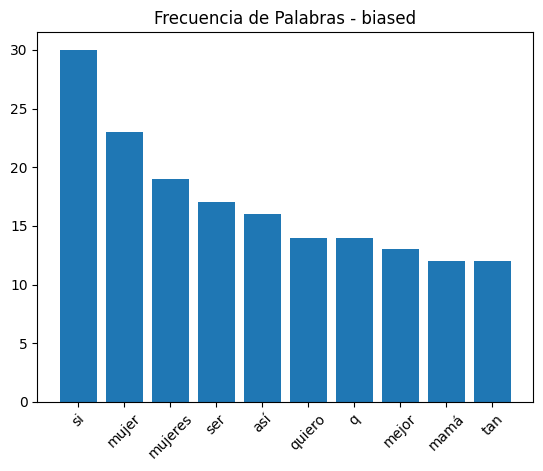

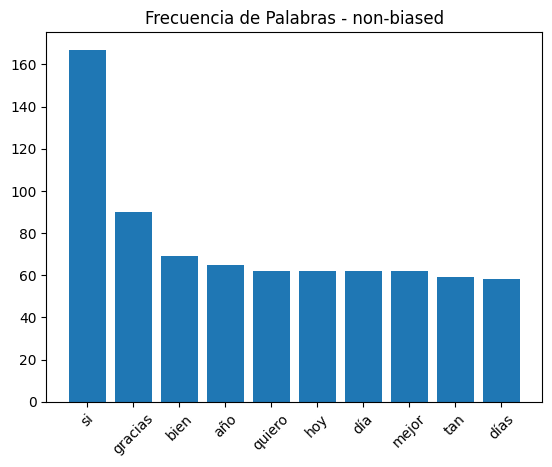

In [48]:
# Contar palabras
def contar_palabras(texto):
    palabras = limpiar_texto(texto)
    return Counter(palabras)

# Visualización de frecuencias de palabras
for etiqueta in data['Label'].unique():
    # Filtrar los tweets con esa etiqueta
    subset = data[data['Label'] == etiqueta]

    # Unir todos los textos en uno solo
    texto = " ".join(subset['Contents'])

    # Contar palabras usando tu función
    frecuencias = contar_palabras(texto)

    # Visualizar
    frecuencias = dict(frecuencias.most_common(10))
    plt.bar(frecuencias.keys(), frecuencias.values())
    plt.title(f'Frecuencia de Palabras - {etiqueta}')
    plt.xticks(rotation=45)
    plt.show()

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

1. Las palabras mas comunes en el biased son mujer, mujeres, ser, quiero, etc. En cambio en la columna de non-biased hay palabras mas imparciales, como lo son año, hoy, día, mejor, tan, etc.

2. Para mi el hecho de que en biased aparezcan más palabras como "mujer", "mujeres", y "mamá" me puede llegar a indicar que los tweets sesgados están relacionados con opiniones sobre género o roles en familia, donde puede haber prejuicios o estereotipos.

3. Las empresas pueden identificar gracias a esto temas sensibles o áreas de conflicto que suelen generar opiniones divididas. Esto les permite enfocar sus estrategias de comunicación o moderar su discurso en esos temas para manejar mejor la percepción que su publico tiene sobre ellos.

  También, pueden crear campañas específicas para derribar estereotipos o en dado caso ayudar a promover mensajes inclusivos.

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

In [49]:
## Cree una funcion para geenrar nube de palabras
def generar_nube_palabras(texto):
    palabras = ' '.join(limpiar_texto(texto))
    nube = WordCloud(width=800, height=400, background_color='white').generate(palabras)
    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.show()


Nube de palabras para etiqueta: biased


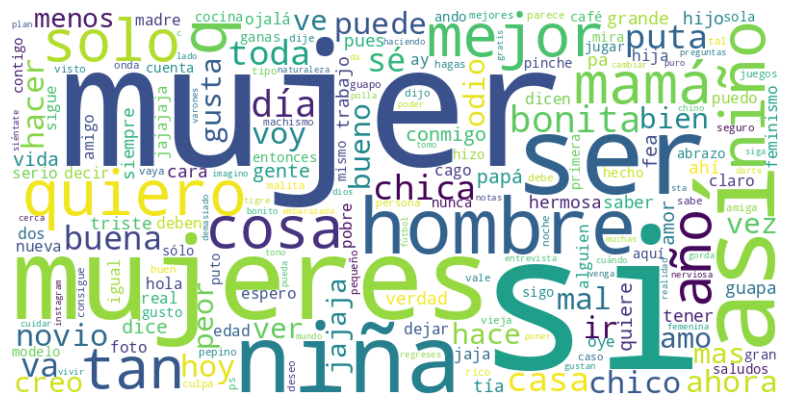


Nube de palabras para etiqueta: non-biased


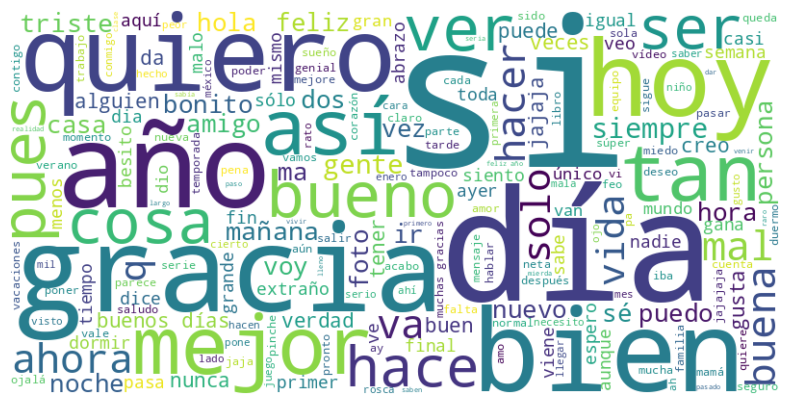

In [55]:
# Generar nube de palabras para cada conjunto

for etiqueta in data['Label'].unique():
    subset = data[data['Label'] == etiqueta]
    texto = " ".join(subset['Contents'])
    print(f"\nNube de palabras para etiqueta: {etiqueta}")
    generar_nube_palabras(texto)

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

1. Ajustar el tono y contenido de su comunicación para evitar palabras o temas que puedan generar reacciones negativas o sesgadas. Así como tambien crear mensajes más inclusivos y cuidadosos, especialmente en temas sensibles para conectar mejor con la audiencia y reducir malentendidos.

2. Yo implementaria algunas campañas de concientizacion para que las personas se den cuenta que tipo de opiniones estan teniendo y cuales pueden llegar a ser controversiales o sesgadas por alguna razón externa.

3. puede ser análisis de sentimientos o de temas, ya que también podría ayudar a las empresas a saber que temas se pueden hablar, y que tipo de publico tienen para saber cuales son los sensibles y cuales no tanto.